In [1]:
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

(57, 67, 56)


Text(0.5, 0.98, 'Center slices for anatomical image')

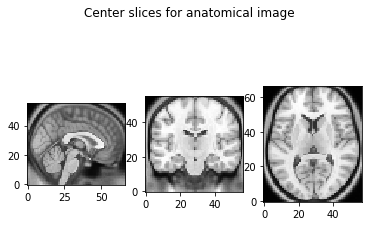

In [3]:
anat_img = nib.load('C:/Users/StarDust/Desktop/imgs/someones_anatomy.nii.gz')
anat_img_data = anat_img.get_fdata()
print(anat_img_data.shape)
show_slices([anat_img_data[28, :, :], anat_img_data[:, 33, :], anat_img_data[:, :, 28]])
plt.suptitle("Center slices for anatomical image")

(53, 61, 33)


Text(0.5, 0.98, 'Center slices for anatomical image')

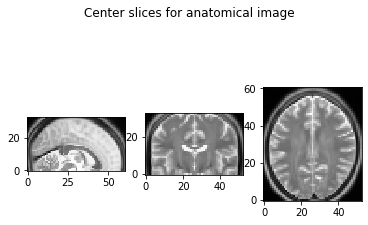

In [4]:
epi_img = nib.load('C:/Users/StarDust/Desktop/imgs/someones_epi.nii.gz')
epi_img_data = epi_img.get_fdata()
print(epi_img_data.shape)
show_slices([epi_img_data[26, :, :], epi_img_data[:, 30, :], epi_img_data[:, :, 16]])
plt.suptitle("Center slices for anatomical image")

# Header

In [5]:
print(anat_img.header)
print(epi_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 57 67 56  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   2.75 2.75 2.75 1.   1.   1.   1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -78.0
qoffset_y       : -91.0
qoffset_z       : -91.0
srow_x          : [  2.75   0.     0.   -78.  ]
srow

# Affine

In [6]:
print(anat_img.affine)
print(epi_img.affine)

[[  2.75   0.     0.   -78.  ]
 [  0.     2.75   0.   -91.  ]
 [  0.     0.     2.75 -91.  ]
 [  0.     0.     0.     1.  ]]
[[  3.           0.           0.         -78.        ]
 [  0.           2.86600947  -0.88656062 -76.        ]
 [  0.           0.88656062   2.86600947 -64.        ]
 [  0.           0.           0.           1.        ]]


# Shape

In [7]:
print(anat_img.shape)
print(epi_img.shape)

(57, 67, 56)
(53, 61, 33)


# Voxel size in mm

In [8]:
print(anat_img.header.get_zooms())
print(epi_img.header.get_zooms())

(2.75, 2.75, 2.75)
(3.0, 3.0, 3.0)


In [9]:
import nibabel.processing
anat_resmpled = nibabel.processing.conform(anat_img, anat_img.shape, (1.0, 1.0, 1.0))

In [10]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\plotting\html_stat_map.py:83: UserWarning: Threshold given was 1e-06, but the data has no values below 6.678363800048828. 
  data.min()))



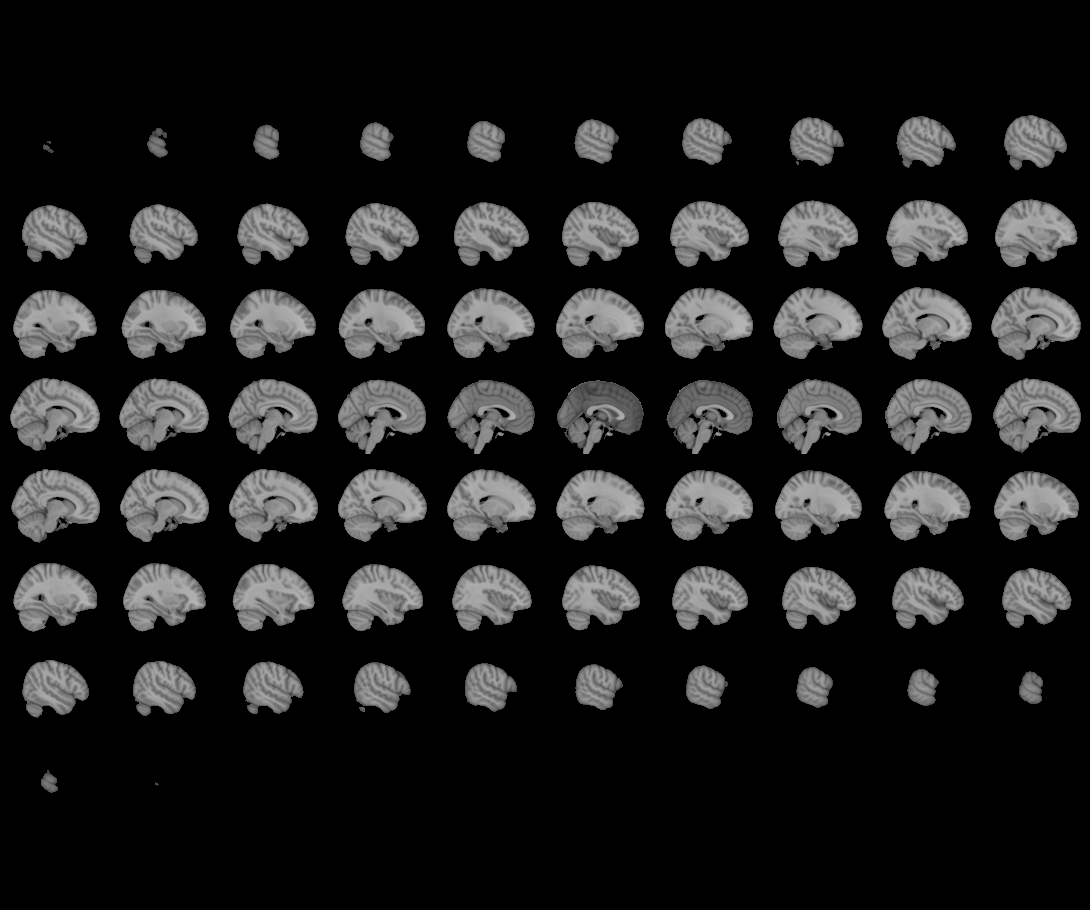
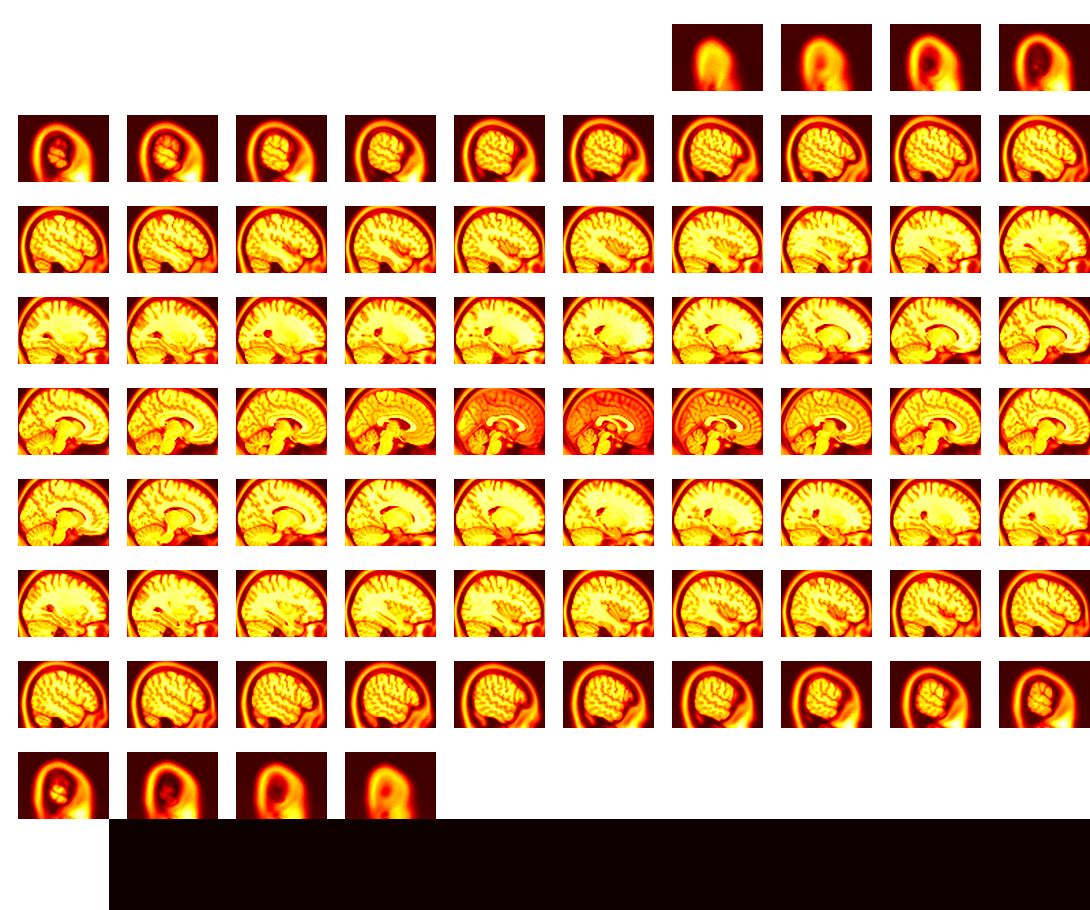

In [11]:
view_img(anat_img)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\plotting\html_stat_map.py:83: UserWarning: Threshold given was 1e-06, but the data has no values below 9.50381851196289. 
  data.min()))



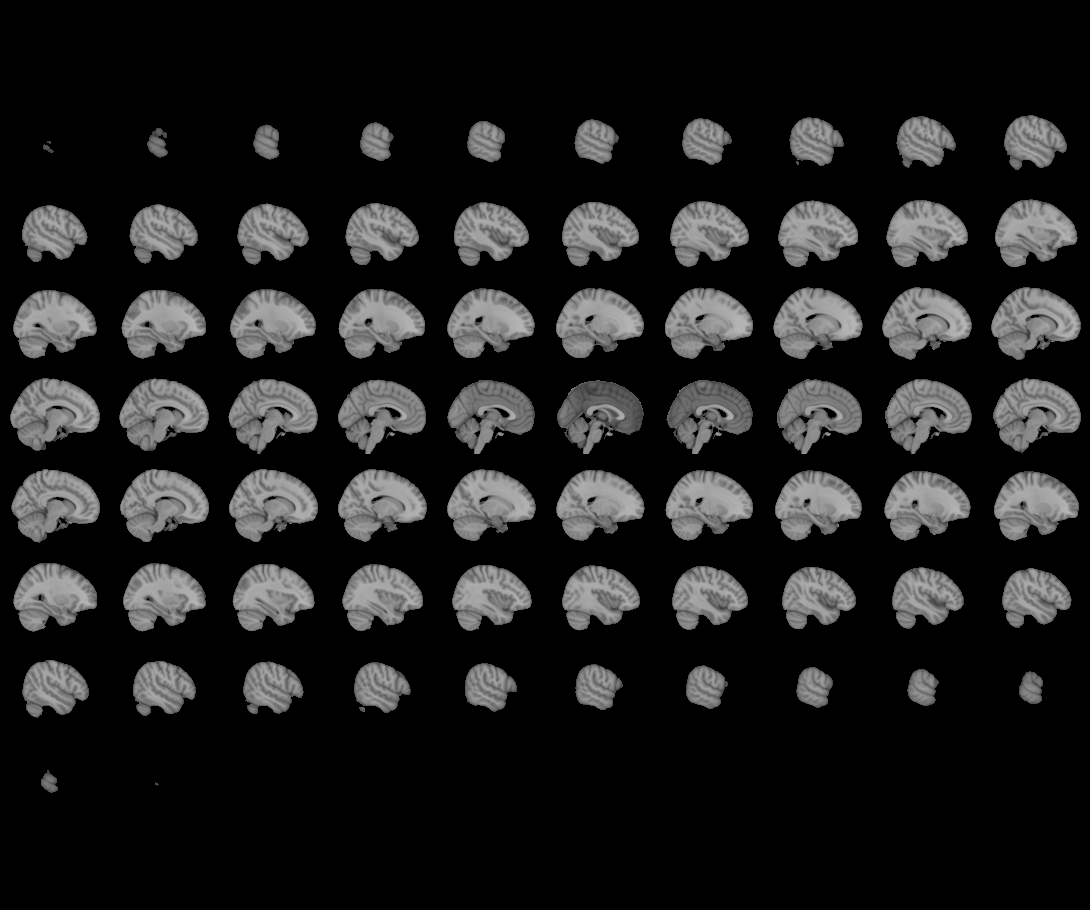
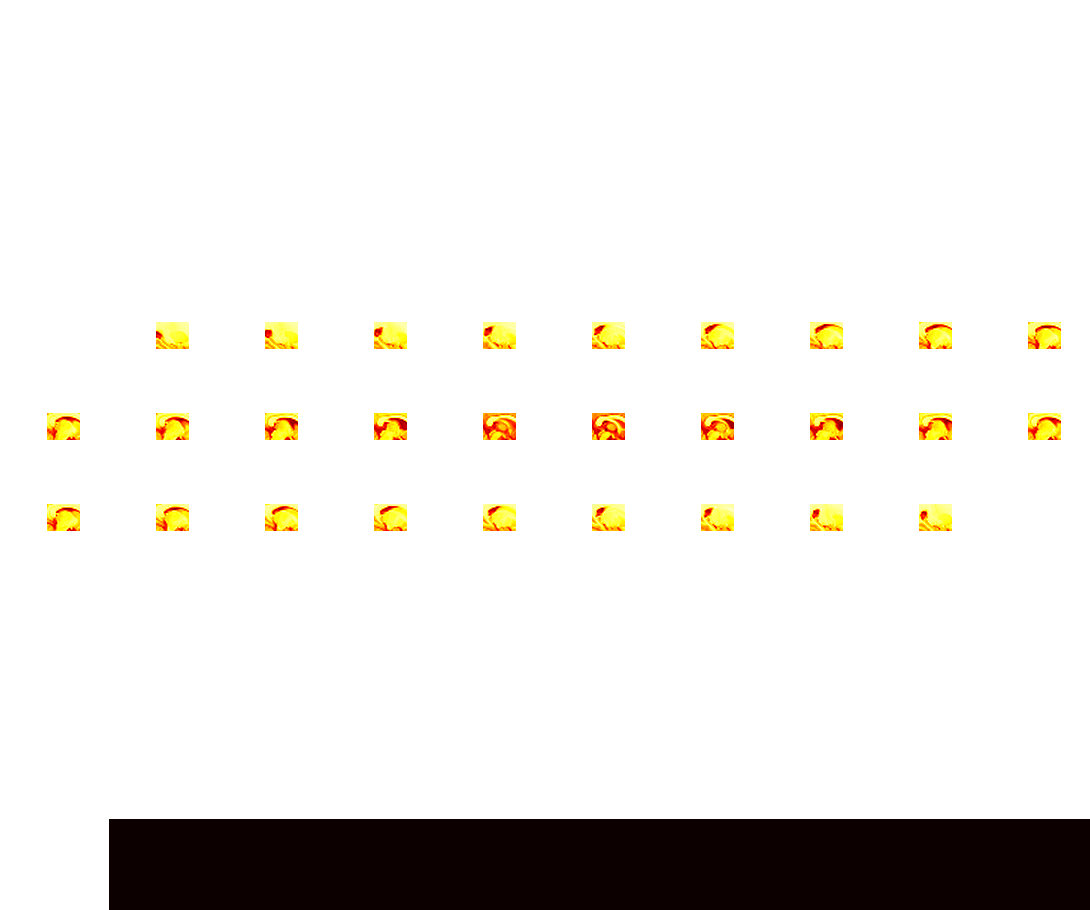

In [12]:
view_img(anat_resmpled)

In [13]:
print(anat_img.shape)
print(anat_resmpled.shape)

(57, 67, 56)
(57, 67, 56)


In [45]:
nib.save(anat_resmpled, 'C:/Users/StarDust/Desktop/imgs/someones_anatomy_resampled.nii.gz')


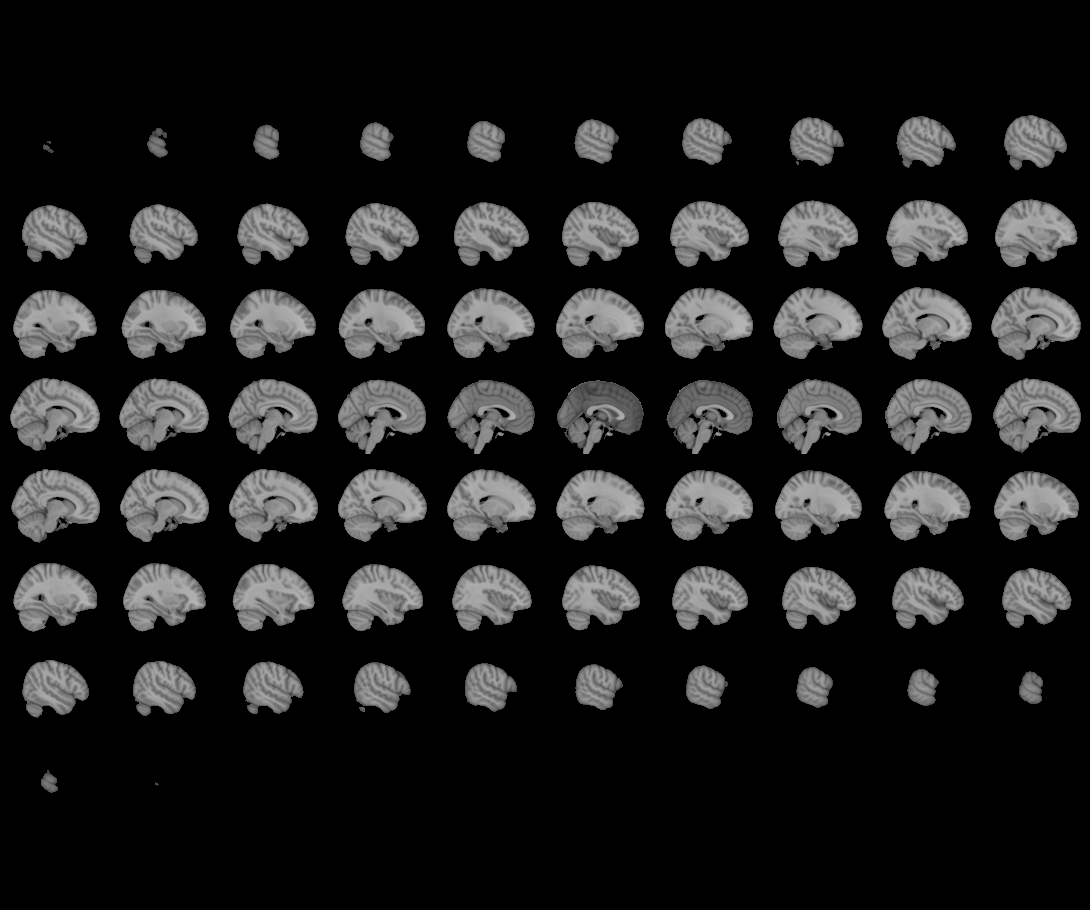
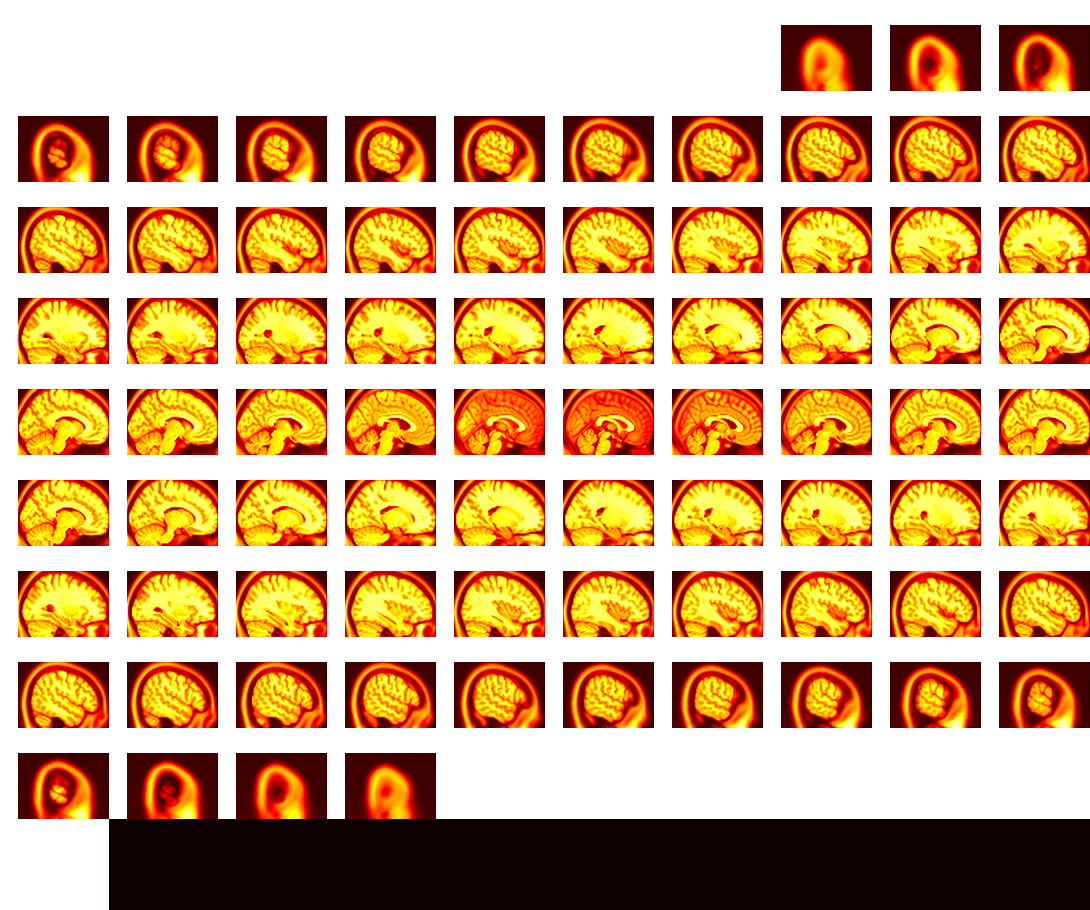

In [14]:
anat_resmpled2 = nibabel.processing.conform(anat_img, (240, 240, 240), (1.0, 1.0, 1.0))
view_img(anat_resmpled2)

In [51]:
print(anat_resmpled2.shape)
nib.save(anat_resmpled2, 'C:/Users/StarDust/Desktop/imgs/someones_anatomy_resampled2.nii.gz')

(240, 240, 240)


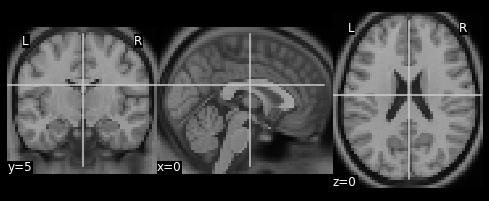

In [17]:
plot_anat(anat_img)

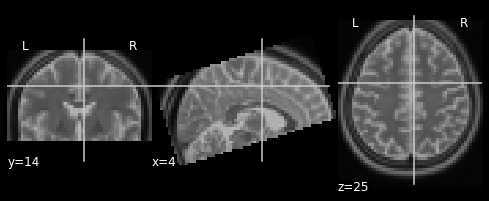

In [19]:
plot_anat(epi_img)

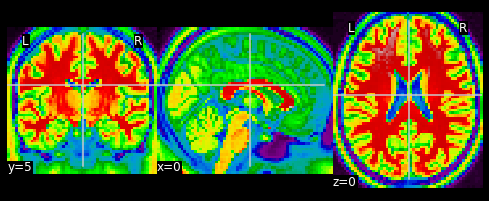

In [21]:
plot_epi(anat_img)

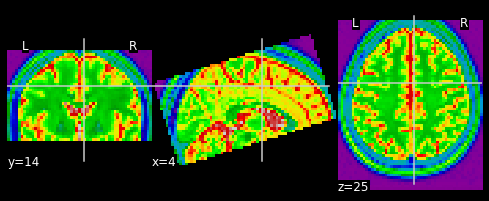

In [22]:
plot_epi(epi_img)